In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats
from scipy.stats import lognorm,norm, t,f_oneway,f,chi2,chisquare,chi2_contingency,pearsonr,spearmanr

from scipy.stats import shapiro,levene,ttest_rel

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv(r"C:\Users\VIRAJ\Downloads\bike_sharing.txt")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Problem Statement

### Which variables are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables describe the electric cycle demands

## Analyzing basic metrics

In [7]:
df.shape #The dataset has 10886 rows and 12 columns

(10886, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
#Checking data types of each column

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [11]:
#Checking Stastical summary of the data

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2012-11-11 19:00:00
freq,1


In [18]:
print(df.isnull().sum())

#df[df.isnull().any(axis=1)]

#df.isna()
#df[df.isna()]
#df[df.isnull().any(axis=1)]
#df[df.isnull(axis=1)]

#On checking the dataset we found that there are no null values in any of the columns.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## Non-Graphical Analysis: Value counts and unique attributes

In [14]:
df['season'].value_counts() 

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [37]:
df['workingday'].value_counts() 

#We have data for 7412 working days and 3474 non-working day

1    7412
0    3474
Name: workingday, dtype: int64

In [15]:
df.groupby('season')['count'].nunique()

#We see that the count of sales is highest in the season 4 and lowest in season 1

season
1    446
2    665
3    662
4    619
Name: count, dtype: int64

In [16]:
df.groupby('workingday')['count'].nunique()

#The sales are high on working day compared to that of weekends/holidays. We can infer that people use Yulu bikes for commuting
#to their office.

workingday
0    629
1    802
Name: count, dtype: int64

In [17]:
df.groupby('windspeed')['count'].nunique()

#Count is highest when the windspeed to zero and it decreases gradually when the windspeed decreases.

windspeed
0.0000     446
6.0032     360
7.0015     397
8.9981     440
11.0014    456
12.9980    460
15.0013    450
16.9979    424
19.0012    387
19.9995    322
22.0028    235
23.9994    205
26.0027    184
27.9993    158
30.0026     97
31.0009     81
32.9975     73
35.0008     53
36.9974     21
39.0007     27
40.9973     10
43.0006     12
43.9989      8
46.0022      3
47.9988      2
50.0021      1
51.9987      1
56.9969      2
Name: count, dtype: int64

## Visual Analysis - Univariate & Bivariate

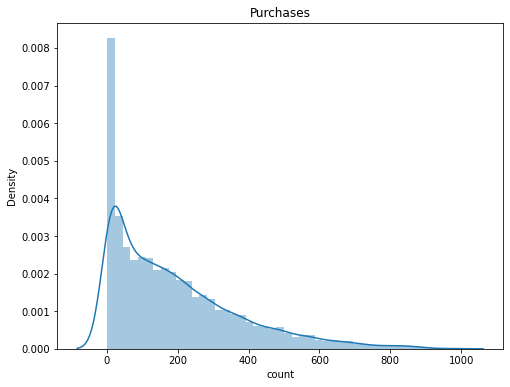

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['count'],ax=ax)
plt.title("Purchases")
plt.show()

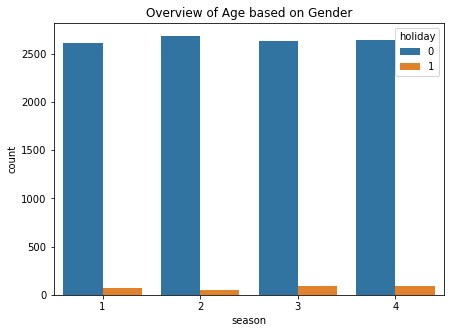

In [31]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df,x='season',hue='holiday',ax=ax)
plt.title("Overview of Age based on Gender")
plt.show()

#We can see that most of the sales are done when there is no holiday and very less sales on weekend/holidays.

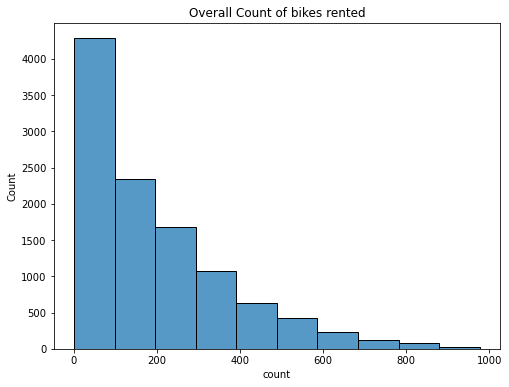

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['count'],bins=10,ax=ax)
plt.title("Overall Count of bikes rented")
plt.show()

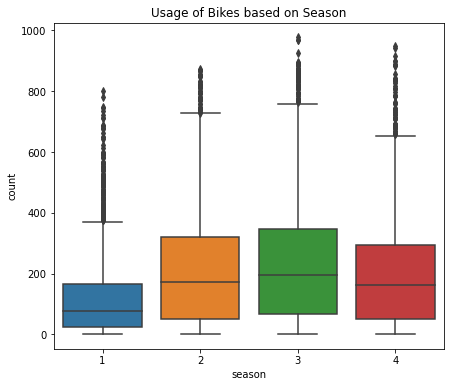

In [25]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(data=df,x='season',y='count',ax=ax)
plt.title("Usage of Bikes based on Season")
plt.show()

#We can infer that cycles rented are highest in season 3 and lowest in season 1

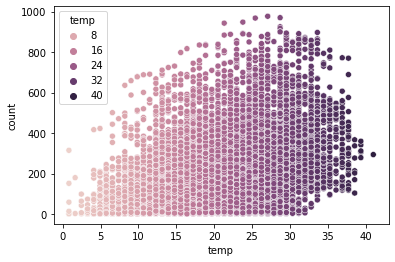

In [29]:
sns.scatterplot(x='temp', y='count', data=df, hue='temp',sizes=(30, 200), legend='brief')

#The sales seems to be ideal when the temperature is between 25 and 35 and low above 38 and below 20

## Hypothesis Testing

### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [ ]:
#H0: Working Day has no effect on number of cycles rented - mu1 = mu2
#Ha: Working Day has a effect on number of cycles rented - mu1 < mu2
#We can check the above for 95% confidence Interval

In [5]:
df_working_Day = df[df["holiday"]==1]["count"]
df_Nonworking_Day = df[df["holiday"]==0]["count"]

In [6]:
alpha = 0.05
test_stat,p_value = ttest_ind(df_working_Day,df_working_Day,alternative="greater")
print(test_stat)
print(p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")
    
#Here we can infer that Working Day has an effect on the number of electric cycles rented

0.0
0.5
Failed to reject H0


## ANNOVA to check if No. of cycles rented is similar or different in different weather

In [42]:
#Before applying ANNOVA test we will use Shapiro test to check if the data follows Gaussian distribution or not.

df_weather = df["weather"]

#Ho - Null Hypothesis - Data is Gaussian
#Ha - Alternate Hypothesis - Data is not gaussian

In [43]:
shapiro(df_weather)

#The pvalue is very low, we can infer that data is not gaussian.

ShapiroResult(statistic=0.6570713520050049, pvalue=0.0)

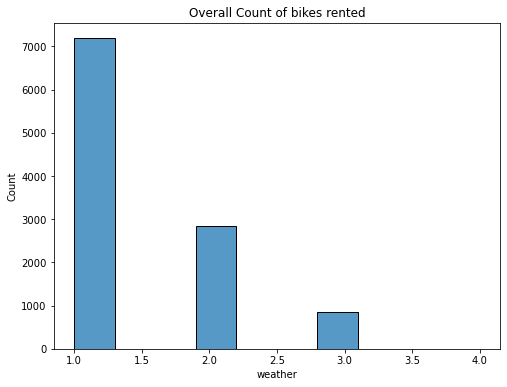

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['weather'],bins=10,ax=ax)
plt.title("Overall Count of bikes rented")
plt.show()

#Also upon plotting we see that data is heavily right skewed

In [ ]:
# We will use log-transform to check if we can convert the data into Gaussian distribution

In [75]:
df_weather1 = df["weather"].mean()
df_weather1

1.418427337865148

In [76]:
df_weather2 = df["weather"].std()
df_weather2

0.6338385858190921

In [68]:
log_normal = np.log(df_weather)

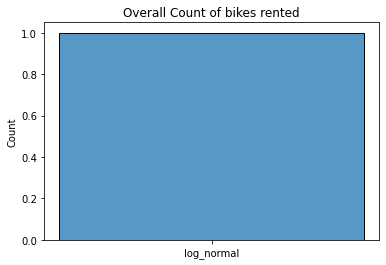

In [80]:
sns.histplot('log_normal',bins=5)
plt.title("Overall Count of bikes rented")
plt.show()

In [81]:
lognorm.cdf(1.41,0.63)

0.7072540696776257

In [ ]:
#Even after performing log normal the data is not getting transformed into Gaussian. We will then proceed with Annova test as is
#with 95% confidence

In [82]:
count_weather1 = df[df["weather"]==1]["count"]
count_weather2 = df[df["weather"]==2]["count"]
count_weather3 = df[df["weather"]==3]["count"]
count_weather4 = df[df["weather"]==4]["count"]

In [95]:
#H0: Mean Count of bikes rented in all weather is same.
#Ha: Mean Count of bikes rented in all weather is different.

f_stat,p_value = f_oneway(count_weather1,count_weather2,count_weather3,count_weather4)
f_stat,p_value

(65.53024112793271, 5.482069475935669e-42)

In [96]:
alpha=0.05

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")
    
#Thus we can say that No. of cycles rented is different in different weather

Reject H0


## ANNOVA to check if No. of cycles rented is similar or different in different season

In [86]:
#Before applying ANNOVA test we will use Shapiro test to check if the data follows Gaussian distribution or not.

df_season= df["season"]

#Ho - Null Hypothesis - Data is Gaussian
#Ha - Alternate Hypothesis- Data is not gaussian

In [87]:
shapiro(df_season)

#The pvalue is very low, we can infer that data is not gaussian.

ShapiroResult(statistic=0.8566985726356506, pvalue=0.0)

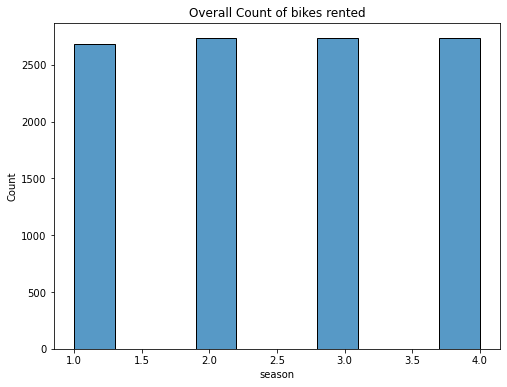

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['season'],bins=10,ax=ax)
plt.title("Overall Count of bikes rented")
plt.show()

#Also upon plotting we see that data is not following a Gaussian distribution

In [90]:
log_normal_season = np.log(df_season)

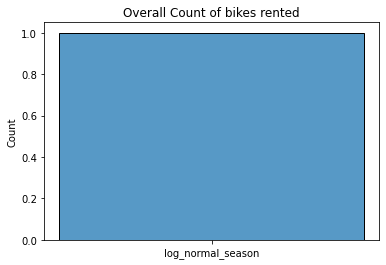

In [92]:
sns.histplot('log_normal_season',bins=10)
plt.title("Overall Count of bikes rented")
plt.show()

In [ ]:
#Even after performing log normal the data is not getting transformed into Gaussian. We will then proceed with Annova test as is
#with 95% confidence

In [93]:
count_season1 = df[df["season"]==1]["count"]
count_season2 = df[df["season"]==2]["count"]
count_season3 = df[df["season"]==3]["count"]
count_season4 = df[df["season"]==4]["count"]

In [97]:
#H0: Mean Count of bikes rented in all season is same.
#Ha: Mean Count of bikes rented in all season is different.

f_stat,p_value = f_oneway(count_season1,count_season2,count_season3,count_season4)
f_stat,p_value

(236.94671081032106, 6.164843386499654e-149)

In [98]:
alpha=0.05

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")
    
#Thus we can say that No. of cycles rented is different in different season

Reject H0


## Chi-square test to check if Weather is dependent on the season

In [101]:
#Ho - Null Hypothesis: Weather is not dependent on the Season
#Ha - Alternate Hypothesis: Weather is dependent on the Season

weather_season = pd.crosstab(index=df["weather"],columns=df["season"])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [104]:
test_stat,p_value,df,exp_freq = chi2_contingency(weather_season)

In [105]:
test_stat,p_value,df,exp_freq

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [106]:
alpha=0.05

if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")
    
#Thus we can say that Weather is dependent on the Season

Reject H0


## Insights

#### 1) We see that there is a difference in the number of bikes rented in different seasons

#### 2) There is a difference in the number of bikes rented on weekdays v/s number of bikes rented on weekends/holidays

#### 3) Similar to different seasons we can infer that the no. of rented bikes is depending on the weather conditions

#### 4) Chi-squared analysis gave us the insight that weather is dependent on the season

#### 5) The number of cycles rented in clear conditions is greater than other weather conditions

## Recommendations

#### 1) The number of bikes rented on weekends/holidays is very less compared to weekdays. Yulu should offer special discounts or must roll out sum offers to increase the sales on weekends

#### 2) For first time users Yulu can try to offer huge discounts on first ride so that give positive feedback and this may increase the overall sales

#### 3) On rainy days Yulu can try to provide extra accessories like protective gears which may increase the safet of the ride and thus more people might opt this even on rainy days